In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Police_brutality_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure and the types of data it contains
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Police Department                               60 non-null     object 
 1   State                                           60 non-null     object 
 2   2014 population (US Census)                     60 non-null     int64  
 3   2015 victims                                    60 non-null     int64  
 4   Rate of Police Killings per Million Population  60 non-null     float64
 5   Black population (2012 Census by Race)          60 non-null     int64  
 6   Percent population black                        60 non-null     float64
 7   2015 black victims                              60 non-null     int64  
 8   Percent victims black                           60 non-null     float64
 9   Disparity                                    

(None,
   Police Department       State  2014 population (US Census)  2015 victims  \
 0       Bakersfield  California                       368759             5   
 1     Oklahoma City    Oklahoma                       620602             8   
 2           Oakland  California                       413775             5   
 3      Indianapolis     Indiana                       848788             9   
 4        Long Beach  California                       473577             5   
 
    Rate of Police Killings per Million Population  \
 0                                           13.56   
 1                                           12.89   
 2                                           12.08   
 3                                           10.60   
 4                                           10.56   
 
    Black population (2012 Census by Race)  Percent population black  \
 0                                   26677                      0.07   
 1                                   85744     

In [14]:
# Basic statistics to understand the dataset better
basic_stats = data.describe()

# Checking for any missing values across the dataset
missing_values = data.isnull().sum()

basic_stats, missing_values

(       2014 population (US Census)  2015 victims  \
 count                 6.000000e+01     60.000000   
 mean                  8.988502e+05      4.150000   
 std                   1.182936e+06      3.663031   
 min                   3.174190e+05      0.000000   
 25%                   4.121330e+05      2.000000   
 50%                   6.062110e+05      3.000000   
 75%                   8.391648e+05      5.000000   
 max                   8.491079e+06     22.000000   
 
        Rate of Police Killings per Million Population  \
 count                                       60.000000   
 mean                                         5.499500   
 std                                          3.036823   
 min                                          0.000000   
 25%                                          3.047500   
 50%                                          5.520000   
 75%                                          6.615000   
 max                                         13.560000   

# Task 1: EDA

The dataset contains data on police brutality, structured with 60 entries and 12 columns. Here's a brief overview of its content:

- **Police Department**: The name of the police department.
- **State**: The U.S. state where the department is located.
- **2014 population (US Census)**: Population of the area covered by the police department according to the 2014 U.S. Census.
- **2015 victims**: The number of victims of police killings in 2015.
- **Rate of Police Killings per Million Population**: The rate of police killings per million population.
- **Black population (2012 Census by Race)**: The number of black individuals in the population according to the 2012 Census.
- **Percent population black**: The percentage of the population that is black.
- **2015 black victims**: The number of black victims of police killings in 2015.
- **Percent victims black**: The percentage of victims who are black.
- **Disparity**: A metric indicating the disparity in police killings.
- **Violent crimes (2014 FBI UCR)**: The number of violent crimes reported in the FBI's Uniform Crime Reports for 2014.
- **Violent Crime per 1,000 residents**: The rate of violent crimes per 1,000 residents.
  
From this initial overview, several key questions and areas of analysis emerge:

1. **Racial Disparities**: What is the extent of racial disparities in police killings? How does the percentage of black victims compare to their representation in the population?

2. **Geographical Patterns**: Are there geographical patterns in the rates of police killings or racial disparities? How do these patterns correlate with demographics or crime rates?

These questions can guide a deeper analysis into the issues of police brutality, racial disparities, and their relationship with crime rates across different regions.

# Task 2: Chart Type Selection

To address the questions identified from the exploratory data analysis, I suggest the following visualizations to effectively communicate insights and patterns within the dataset on police brutality:

### 1. **Racial Disparities**:
- **Bar Chart**: Compare the percent of black victims to their representation in the population for each police department to highlight disparities.
- **Pie Charts**: For select departments with high rates of police killings, pie charts could illustrate the racial breakdown of victims compared to the local population's racial composition.

### 2. **Geographical Patterns**:
- **Choropleth Map**: Display the rate of police killings or the disparity index across states or regions to visualize geographical patterns.
- **Bubble Map**: Use bubble sizes to represent the rate of police killings and colors to indicate the disparity index or the percent population black, providing a nuanced geographical view of the data.

# Task 3: Visualization Concepts
Sketch out the different ways I might communicate the message.

## Question 1: Racial Disparities

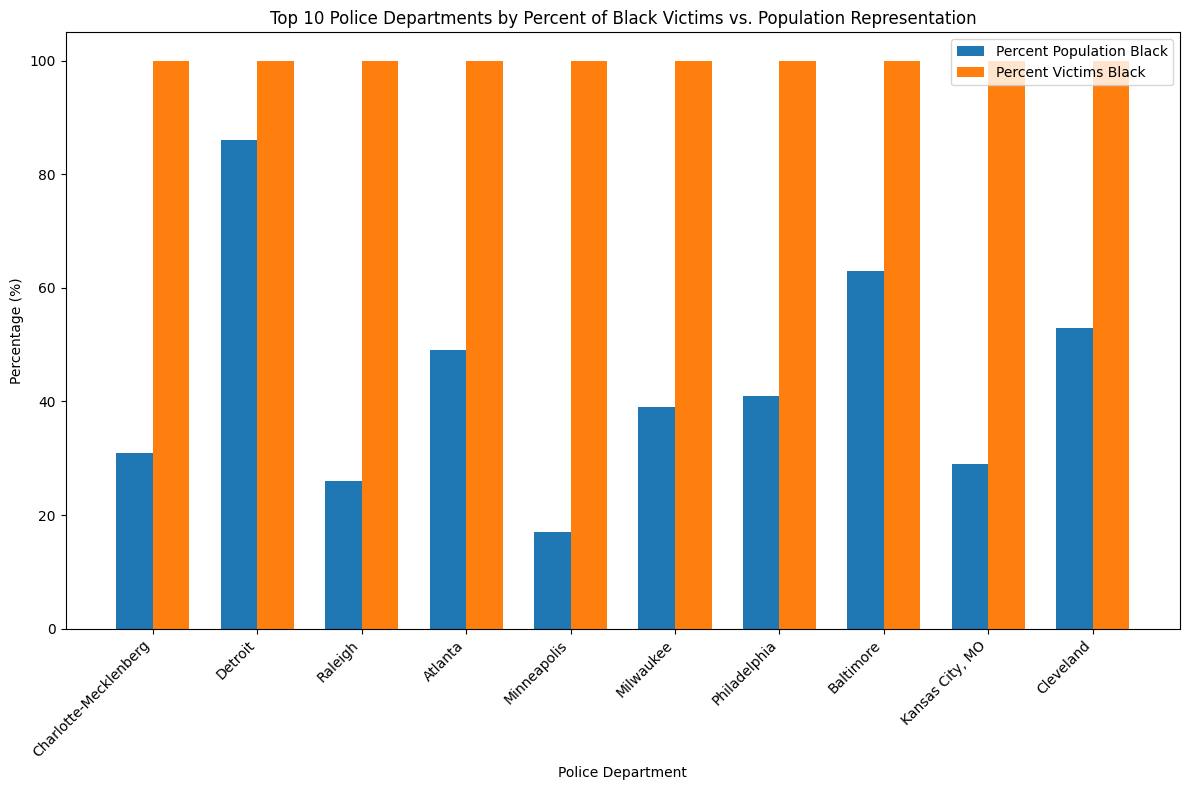

In [15]:
# For Racial Disparities Analysis, we'll start with a Bar Chart comparing the percent of black victims to their representation in the population

# Creating a new DataFrame to focus on racial disparities
racial_disparities = data[['Police Department', 'State', 'Percent population black', 'Percent victims black']].copy()

# Sorting the DataFrame based on the 'Percent victims black' to highlight the departments with the highest disparities
racial_disparities_sorted = racial_disparities.sort_values(by='Percent victims black', ascending=False)

# Plotting the top 10 police departments with the highest percent of black victims
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(10)

bars1 = plt.bar(index, racial_disparities_sorted['Percent population black'].head(10) * 100, bar_width, label='Percent Population Black')
bars2 = plt.bar(index + bar_width, racial_disparities_sorted['Percent victims black'].head(10) * 100, bar_width, label='Percent Victims Black')

plt.xlabel('Police Department')
plt.ylabel('Percentage (%)')
plt.title('Top 10 Police Departments by Percent of Black Victims vs. Population Representation')
plt.xticks(index + bar_width / 2, racial_disparities_sorted['Police Department'].head(10), rotation=45, ha="right")
plt.legend()
plt.tight_layout()

plt.show()

The bar chart above illustrates the top 10 police departments with the highest percentages of black victims of police killings, compared to the black population's representation in those areas. Each department is represented by two bars: one for the percent of the black population (left bar) and the other for the percent of black victims (right bar). This visualization highlights the disparities in police killings, showing a difference in most cases between the proportion of the black population and the proportion of black victims. This analysis underscores the racial disparities present in police killings across these departments, providing a visual representation of the issue at hand.

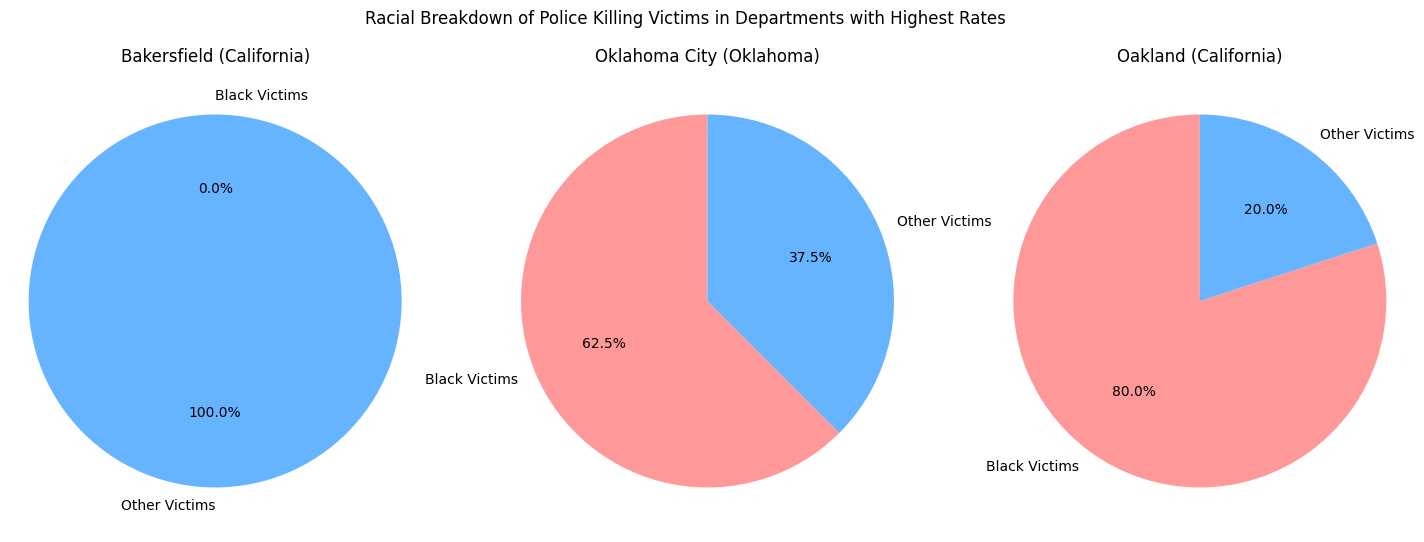

In [4]:
# Selecting departments with high rates of police killings for pie chart analysis
# For simplicity, let's focus on the top 3 departments based on 'Rate of Police Killings per Million Population'
top_departments = data.sort_values(by='Rate of Police Killings per Million Population', ascending=False).head(3)

# Creating pie charts for these departments
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Looping through the top 3 departments to create pie charts
for i, row in top_departments.iterrows():
    labels = ['Black Victims', 'Other Victims']
    sizes = [row['2015 black victims'], row['2015 victims'] - row['2015 black victims']]
    colors = ['#ff9999','#66b3ff']
    axes[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axes[i].set_title(f"{row['Police Department']} ({row['State']})")

plt.suptitle('Racial Breakdown of Police Killing Victims in Departments with Highest Rates')
plt.show()

The pie charts above illustrate the racial breakdown of police killing victims in the three police departments with the highest rates of police killings per million population. Each chart represents a different department and shows the proportion of black victims compared to victims of other races within that department's total police killings in 2015.

These visualizations provide an immediate understanding of the racial composition of police killing victims in these high-incident areas, highlighting the racial disparities within the context of police violence. The use of distinct colors helps to differentiate between black victims and victims of other races, emphasizing the proportion of black victims in each department's total.

## Question 2: Geographical Patterns

![Alt text](Q2_1.jpg)

The conceptual illustration above provides a visual idea of how a choropleth map of the United States might look when visualizing the rate of police killings per million by state. The map uses a gradient color scale that transitions from blue to red colors, where blue colors denote lower rates of police killings and red colors indicate higher rates. Each state is distinctly outlined to show geographical variations clearly.

A legend on the side helps interpret the color scale, with "Low" marked at the lightest end of the spectrum and "High" at the darkest, corresponding to the rate of police killings per million. This visualization aims to offer an intuitive understanding of the geographical patterns in police killings across the country, highlighting areas with particularly high or low rates.

![Alt text](Q2_2.jpg)

The conceptual sketch above illustrates how a bubble map of the United States might look when visualizing the rate of police killings alongside the disparity index or the percent population black. In this visualization, the sizes of the bubbles indicate the rate of police killings, with larger bubbles representing higher rates. The color gradients of the bubbles range from light to dark to signify the disparity index or the percentage of the black population, with darker colors indicating higher values.

This nuanced geographical view highlights areas with significant disparities or high rates of police killings through the combined use of bubble size and color. A legend should be included to explain the scales used for bubble size and color gradient, ensuring the map's data interpretation is clear and intuitive. This approach offers a comprehensive understanding of the geographical patterns in police killings and racial disparities across the country.